In [163]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD THE DATASET

In [164]:
# Connect to SQLite database
conn = sqlite3.connect('im.db')


In [165]:
cur= conn.cursor()

In [166]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
for table in tables:
    print(table[0])

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [167]:
# List all tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)


            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [168]:
df=pd.read_sql("SELECT * FROM sqlite_master WHERE type= 'table';",conn)
df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [169]:
df = pd.read_sql("SELECT * FROM movie_basics LIMIT 10;", conn)
print(df)

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
5  tt0111414                      A Thin Life                 A Thin Life   
6  tt0112502                          Bigfoot                     Bigfoot   
7  tt0137204                  Joe Finds Grace             Joe Finds Grace   
8  tt0139613                       O Silêncio                  O Silêncio   
9  tt0144449            Nema aviona za Zagreb       Nema aviona za Zagreb   

   start_year  runtime_minutes                      genres  
0        2013            175.0          Action,Crime,Drama  
1        2019            114.0

In [170]:
cur.execute("PRAGMA table_info(movie_basics);")           #movie basics schema
schema = cur.fetchall()
print("Schema of movie_basics:")
for col in schema:
    print(col)

Schema of movie_basics:
(0, 'movie_id', 'TEXT', 0, None, 0)
(1, 'primary_title', 'TEXT', 0, None, 0)
(2, 'original_title', 'TEXT', 0, None, 0)
(3, 'start_year', 'INTEGER', 0, None, 0)
(4, 'runtime_minutes', 'REAL', 0, None, 0)
(5, 'genres', 'TEXT', 0, None, 0)


In [171]:
query = "SELECT COUNT(*) AS total_movies FROM movie_basics;"    # total count movie basics
df = pd.read_sql(query, conn)

print(df)

   total_movies
0        146144


In [172]:
df = pd.read_sql("SELECT * FROM movie_basics;", conn)     

# Count nulls per column
null_counts = df.isnull().sum()

print(null_counts)

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [173]:
#movie ratings
df = pd.read_sql("SELECT * FROM movie_ratings LIMIT 10;", conn)
print(df)

     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21
5   tt1069246            6.2       326
6   tt1094666            7.0      1613
7   tt1130982            6.4       571
8   tt1156528            7.2       265
9   tt1161457            4.2       148


In [174]:
df_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)   #checking for null values
print(df_ratings.isnull().sum())

movie_id         0
averagerating    0
numvotes         0
dtype: int64


In [175]:
query = "SELECT COUNT(*)  FROM movie_ratings;"    # total count movie ratings
df = pd.read_sql(query, conn)

print(df)

   COUNT(*)
0     73856


In [176]:
#directors
directors_df = pd.read_sql("SELECT * FROM directors LIMIT 5;", conn)
print(directors_df)

    movie_id  person_id
0  tt0285252  nm0899854
1  tt0462036  nm1940585
2  tt0835418  nm0151540
3  tt0835418  nm0151540
4  tt0878654  nm0089502


In [177]:

directors_df_nulls = pd.read_sql("SELECT * FROM directors;", conn)
print(directors_df_nulls.isnull().sum())

movie_id     0
person_id    0
dtype: int64


In [178]:
#persons
persons_df = pd.read_sql("SELECT * FROM persons LIMIT 5;", conn)
print(persons_df)

   person_id       primary_name birth_year death_year  \
0  nm0061671  Mary Ellen Bauder       None       None   
1  nm0061865       Joseph Bauer       None       None   
2  nm0062070         Bruce Baum       None       None   
3  nm0062195       Axel Baumann       None       None   
4  nm0062798        Pete Baxter       None       None   

                                 primary_profession  
0         miscellaneous,production_manager,producer  
1        composer,music_department,sound_department  
2                        miscellaneous,actor,writer  
3  camera_department,cinematographer,art_department  
4  production_designer,art_department,set_decorator  


In [179]:
full_persons = pd.read_sql("SELECT * FROM persons;", conn)

# Check for null values in each column
print(full_persons.isnull().sum())

person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64


In [180]:
#known for
known_for_df = pd.read_sql("SELECT * FROM known_for LIMIT 10;", conn)
print(known_for_df)

   person_id   movie_id
0  nm0061671  tt0837562
1  nm0061671  tt2398241
2  nm0061671  tt0844471
3  nm0061671  tt0118553
4  nm0061865  tt0896534
5  nm0061865  tt6791238
6  nm0061865  tt0287072
7  nm0061865  tt1682940
8  nm0062070  tt1470654
9  nm0062070  tt0363631


In [181]:
full_known_for = pd.read_sql("SELECT * FROM known_for;", conn)   #check for nulls
print(full_known_for.isnull().sum())

person_id    0
movie_id     0
dtype: int64


In [182]:
#movies akas
df = pd.read_sql("SELECT * FROM movie_akas LIMIT 10;", conn)
print(df)

    movie_id  ordering                                    title region  \
0  tt0369610        10                            Джурасик свят     BG   
1  tt0369610        11                        Jurashikku warudo     JP   
2  tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3  tt0369610        13                  O Mundo dos Dinossauros     BR   
4  tt0369610        14                           Jurassic World     FR   
5  tt0369610        15                           Jurassic World     GR   
6  tt0369610        16                           Jurassic World     IT   
7  tt0369610        17                            Jurski svijet     HR   
8  tt0369610        18                             Olam ha'Yura     IL   
9  tt0369610        19           Jurassic World: Mundo Jurásico     MX   

  language        types   attributes  is_original_title  
0       bg         None         None                0.0  
1     None  imdbDisplay         None                0.0  
2     None 

In [183]:
query = "SELECT * FROM movie_akas;"
akas_df = pd.read_sql(query, conn)

# Count nulls per column
null_counts = akas_df.isnull().sum()
print(null_counts)

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64


In [184]:
#writers
df = pd.read_sql("SELECT * FROM writers LIMIT 10;", conn)
print(df)

    movie_id  person_id
0  tt0285252  nm0899854
1  tt0438973  nm0175726
2  tt0438973  nm1802864
3  tt0462036  nm1940585
4  tt0835418  nm0310087
5  tt0835418  nm0841532
6  tt0878654  nm0284943
7  tt0878654  nm0284943
8  tt0878654  nm0284943
9  tt0996958  nm2286991


In [185]:
query = "SELECT * FROM writers;"
writers_df = pd.read_sql(query, conn)

# Count nulls per column
null_counts = writers_df.isnull().sum()
print(null_counts)

movie_id     0
person_id    0
dtype: int64


In [186]:
#principals
df = pd.read_sql("SELECT * FROM principals LIMIT 10;", conn)
print(df)

    movie_id  ordering  person_id  category       job  \
0  tt0111414         1  nm0246005     actor      None   
1  tt0111414         2  nm0398271  director      None   
2  tt0111414         3  nm3739909  producer  producer   
3  tt0323808        10  nm0059247    editor      None   
4  tt0323808         1  nm3579312   actress      None   
5  tt0323808         2  nm2694680     actor      None   
6  tt0323808         3  nm0574615     actor      None   
7  tt0323808         4  nm0502652   actress      None   
8  tt0323808         5  nm0362736  director      None   
9  tt0323808         6  nm0811056  producer  producer   

                 characters  
0               ["The Man"]  
1                      None  
2                      None  
3                      None  
4          ["Beth Boothby"]  
5         ["Steve Thomson"]  
6  ["Sir Lachlan Morrison"]  
7   ["Lady Delia Morrison"]  
8                      None  
9                      None  


In [187]:
query = "SELECT * FROM principals;"
principals_df = pd.read_sql(query, conn)

# Count nulls per column
null_counts = principals_df.isnull().sum()
print(null_counts)

movie_id           0
ordering           0
person_id          0
category           0
job           850502
characters    634826
dtype: int64


In [188]:
pd.read_sql("PRAGMA table_info(movie_ratings);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,TEXT,0,None,0
1,1,averagerating,REAL,0,None,0
2,2,numvotes,INTEGER,0,None,0


In [189]:
# Load movie_basics
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# Load movie_ratings
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)


In [190]:
conn.close

<function Connection.close()>

In [191]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [192]:
movie_ratings.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [193]:
movie_ratings.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

In [194]:
movie_basics.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
146139    False
146140    False
146141    False
146142    False
146143    False
Length: 146144, dtype: bool

In [195]:
movie_ratings.isnull().sum(), movie_basics.isnull().sum()

(movie_id         0
 averagerating    0
 numvotes         0
 dtype: int64,
 movie_id               0
 primary_title          0
 original_title        21
 start_year             0
 runtime_minutes    31739
 genres              5408
 dtype: int64)

In [196]:


# 1. Fill original_title with primary_title
movie_basics['original_title'] = movie_basics['original_title'].fillna(movie_basics['primary_title'])

# 2. Fill genres with "Unknown"
movie_basics['genres'] = movie_basics['genres'].fillna("Unknown")

# 3. Calculate median runtime per genre
# Only use rows where runtime is present
genre_medians = (
    movie_basics[movie_basics['runtime_minutes'].notnull()]
    .groupby('genres')['runtime_minutes']
    .median()
)

# Overall median for fallback
overall_median = movie_basics['runtime_minutes'].median()

# 4. Fill runtime_minutes based on genre median
def fill_runtime(row):
    if pd.isnull(row['runtime_minutes']):
        return genre_medians.get(row['genres'], overall_median)
    return row['runtime_minutes']

movie_basics['runtime_minutes'] = movie_basics.apply(fill_runtime, axis=1)


In [197]:
movie_basics.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [198]:
imdb = movie_basics.merge(movie_ratings, on="movie_id", how="left")
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,93.0,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [199]:
# Load compressed CSV
bom = pd.read_csv("bom.movie_gross.csv.")

# Quick check
print(bom.head())


                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [200]:
bom.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

In [201]:
bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [202]:
# Fill missing studio with "Unknown"
bom['studio'] = bom['studio'].fillna("Unknown")

# Drop rows with missing domestic_gross (it's critical for performance analysis)
bom = bom.dropna(subset=["domestic_gross"])

bom['foreign_gross'] = bom['foreign_gross'].replace(r'[\$,]', '', regex=True)
bom['domestic_gross'] = bom['domestic_gross'].replace(r'[\$,]', '', regex=True).astype(int)
bom['foreign_gross'] = bom['foreign_gross'].fillna(0).astype(float)
# Normalize title and year for joining with IMDB
bom['title'] = bom['title'].str.strip().str.lower()
bom['year'] = bom['year'].astype(int)


In [203]:
bom.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [204]:
imdb['title'] = imdb['primary_title'].str.strip().str.lower()
imdb['year'] = imdb['start_year'].astype(int)


In [205]:
merged_df = pd.merge(bom, imdb, how='inner', on=['title', 'year'])

print(f"Number of matched films: {len(merged_df)}")
print(merged_df.head())


Number of matched films: 1936
                        title studio  domestic_gross  foreign_gross  year  \
0                 toy story 3     BV       415000000    652000000.0  2010   
1                   inception     WB       292600000    535700000.0  2010   
2         shrek forever after   P/DW       238700000    513900000.0  2010   
3  the twilight saga: eclipse   Sum.       300500000    398000000.0  2010   
4                  iron man 2   Par.       312400000    311500000.0  2010   

    movie_id               primary_title              original_title  \
0  tt0435761                 Toy Story 3                 Toy Story 3   
1  tt1375666                   Inception                   Inception   
2  tt0892791         Shrek Forever After         Shrek Forever After   
3  tt1325004  The Twilight Saga: Eclipse  The Twilight Saga: Eclipse   
4  tt1228705                  Iron Man 2                  Iron Man 2   

   start_year  runtime_minutes                      genres  averagerating 

In [206]:
merged_df.shape

(1936, 13)

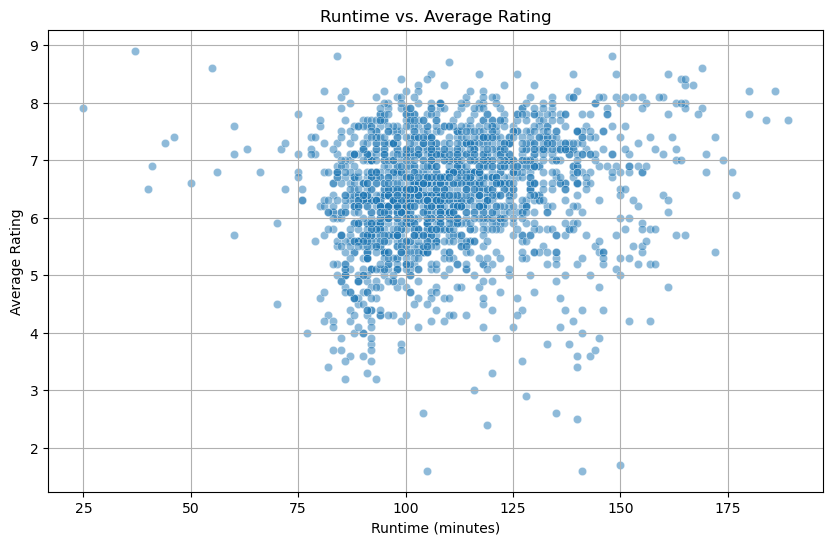

In [207]:
#Explore the Relationship Between Runtime and Rating
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot: Runtime vs. Average Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="runtime_minutes", y="averagerating", alpha=0.5)
plt.title("Runtime vs. Average Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

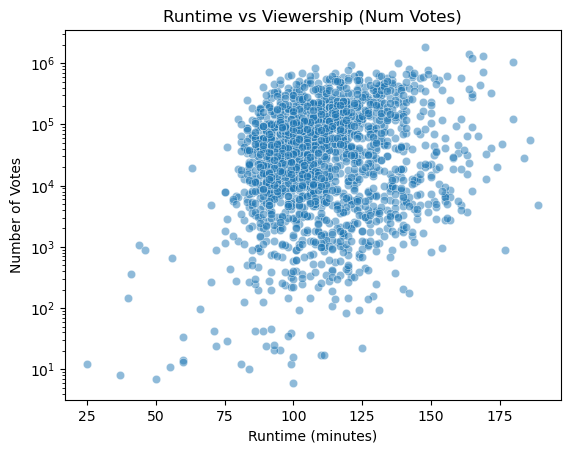

<Axes: xlabel='runtime_minutes', ylabel='numvotes'>

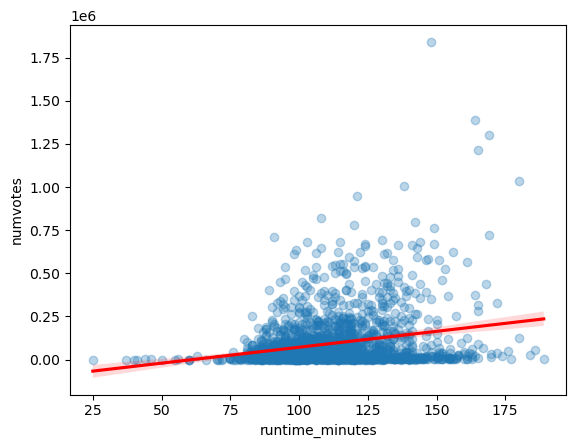

In [208]:
#Runtime vs. Audience Engagement (numvotes)

sns.scatterplot(data=merged_df, x='runtime_minutes', y='numvotes', alpha=0.5)
plt.title("Runtime vs Viewership (Num Votes)")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of Votes")
plt.yscale('log')  # log scale for better spread
plt.show()
sns.regplot(data=merged_df, x='runtime_minutes', y='numvotes', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})


In [209]:

# Create worldwide gross by summing domestic and foreign
merged_df['worldwide_gross'] = merged_df['domestic_gross'] + merged_df['foreign_gross']

# Convert worldwide gross to millions for easier scale
merged_df['worldwide_gross_m'] = merged_df['worldwide_gross'] / 1_000_000

# Explode genres to one row per genre for better analysis
merged_df['genre_list'] = merged_df['genres'].str.split(',')
df_exploded = merged_df.explode('genre_list').rename(columns={'genre_list': 'genre'})

# Filter out invalid or missing values
df_exploded = df_exploded.dropna(subset=['runtime_minutes', 'worldwide_gross_m', 'genre', 'averagerating', 'numvotes'])
df_exploded = df_exploded[(df_exploded['runtime_minutes'] > 0) & (df_exploded['worldwide_gross_m'] > 0)]


In [210]:
bins = [0, 75, 90, 105, 120, 135, 180, np.inf]
labels = ['<75', '75-90', '90-105', '105-120', '120-135', '135-180', '180+']
df_exploded['runtime_bin'] = pd.cut(df_exploded['runtime_minutes'], bins=bins, labels=labels)


In [211]:
stats = df_exploded.groupby(['genre', 'runtime_bin']).agg(
    median_gross_m=('worldwide_gross_m', 'median'),
    avg_rating=('averagerating', 'mean'),
    movie_count=('title', 'count')
).reset_index()

# Filter bins with at least 20 movies for reliability
stats_filtered = stats[stats['movie_count'] >= 20]


C:\Users\Admin\AppData\Local\Temp\ipykernel_13300\2917068689.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_exploded.groupby(['genre', 'runtime_bin']).agg(


C:\Users\Admin\AppData\Local\Temp\ipykernel_13300\4012497354.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runtime_bin', y='median_gross_m', data=data, palette='Blues_d')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13300\4012497354.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runtime_bin', y='avg_rating', data=data, palette='Greens_d')


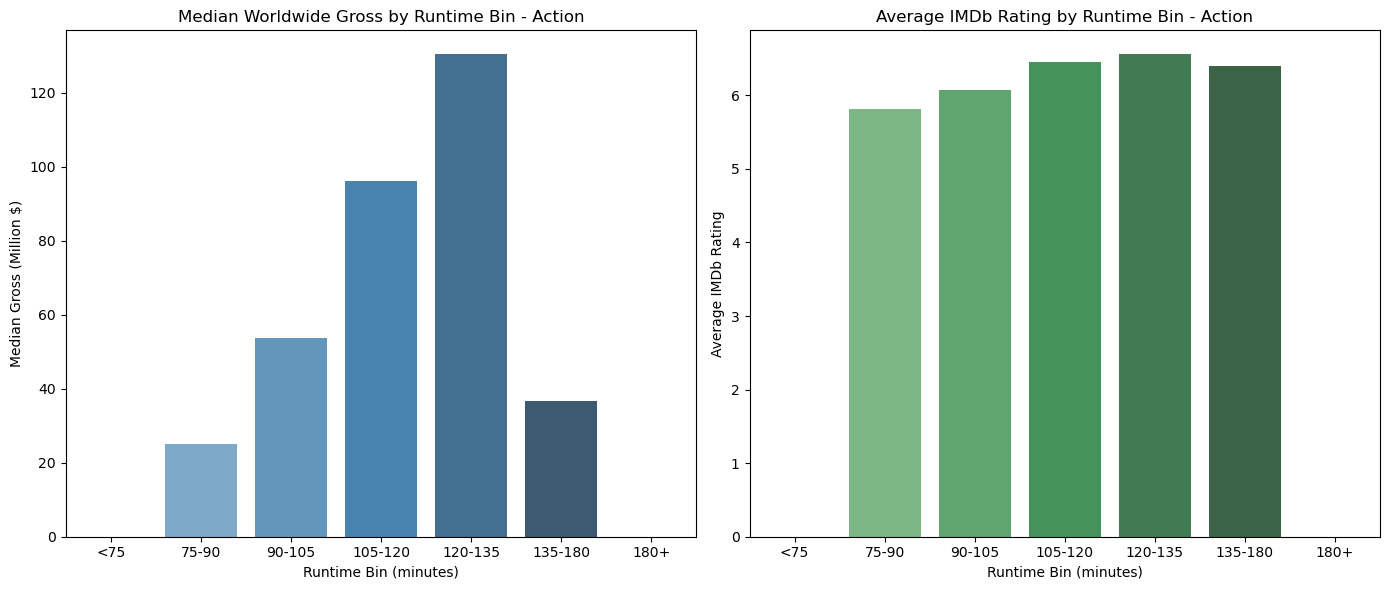

In [212]:
import seaborn as sns

def plot_genre_runtime(genre):
    data = stats_filtered[stats_filtered['genre'] == genre]
    if data.empty:
        print(f"No sufficient data for genre '{genre}'")
        return

    plt.figure(figsize=(14,6))

    plt.subplot(1, 2, 1)
    sns.barplot(x='runtime_bin', y='median_gross_m', data=data, palette='Blues_d')
    plt.title(f'Median Worldwide Gross by Runtime Bin - {genre}')
    plt.xlabel('Runtime Bin (minutes)')
    plt.ylabel('Median Gross (Million $)')

    plt.subplot(1, 2, 2)
    sns.barplot(x='runtime_bin', y='avg_rating', data=data, palette='Greens_d')
    plt.title(f'Average IMDb Rating by Runtime Bin - {genre}')
    plt.xlabel('Runtime Bin (minutes)')
    plt.ylabel('Average IMDb Rating')

    plt.tight_layout()
    plt.show()

# Example usage
plot_genre_runtime('Action')


In [213]:
print(f"Correlation runtime vs worldwide gross (millions): {merged_df['runtime_minutes'].corr(merged_df['worldwide_gross_m']):.3f}")
print(f"Correlation runtime vs average rating: {merged_df['runtime_minutes'].corr(merged_df['averagerating']):.3f}")


Correlation runtime vs worldwide gross (millions): 0.180
Correlation runtime vs average rating: 0.178


In [214]:
# Correlation between runtime and engagement
print(f"Runtime vs Number of Votes: {merged_df['runtime_minutes'].corr(merged_df['numvotes']):.3f}")


Runtime vs Number of Votes: 0.246


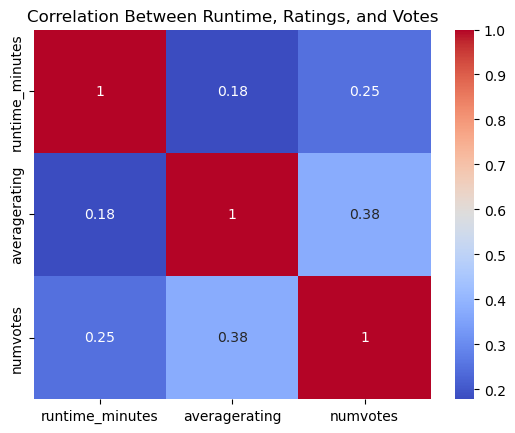

In [215]:
correlation = merged_df[['runtime_minutes', 'averagerating', 'numvotes']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Between Runtime, Ratings, and Votes")
plt.show()

In [216]:

# Use previously defined bins
df_exploded['runtime_bin'] = pd.cut(df_exploded['runtime_minutes'], bins=[0, 75, 90, 105, 120, 135, 180, float('inf')],
                                    labels=['<75', '75-90', '90-105', '105-120', '120-135', '135-180', '180+'])

# Group by bin
engagement_stats = df_exploded.groupby('runtime_bin').agg({
    'averagerating': 'mean',
    'numvotes': 'median',
    'title': 'count'
}).rename(columns={'title': 'film_count'}).reset_index()

# Filter for bins with enough data
engagement_stats = engagement_stats[engagement_stats['film_count'] >= 20]


C:\Users\Admin\AppData\Local\Temp\ipykernel_13300\3266329684.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_stats = df_exploded.groupby('runtime_bin').agg({


C:\Users\Admin\AppData\Local\Temp\ipykernel_13300\1013722390.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engagement_stats, x='runtime_bin', y='averagerating', palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13300\1013722390.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engagement_stats, x='runtime_bin', y='numvotes', palette='rocket')


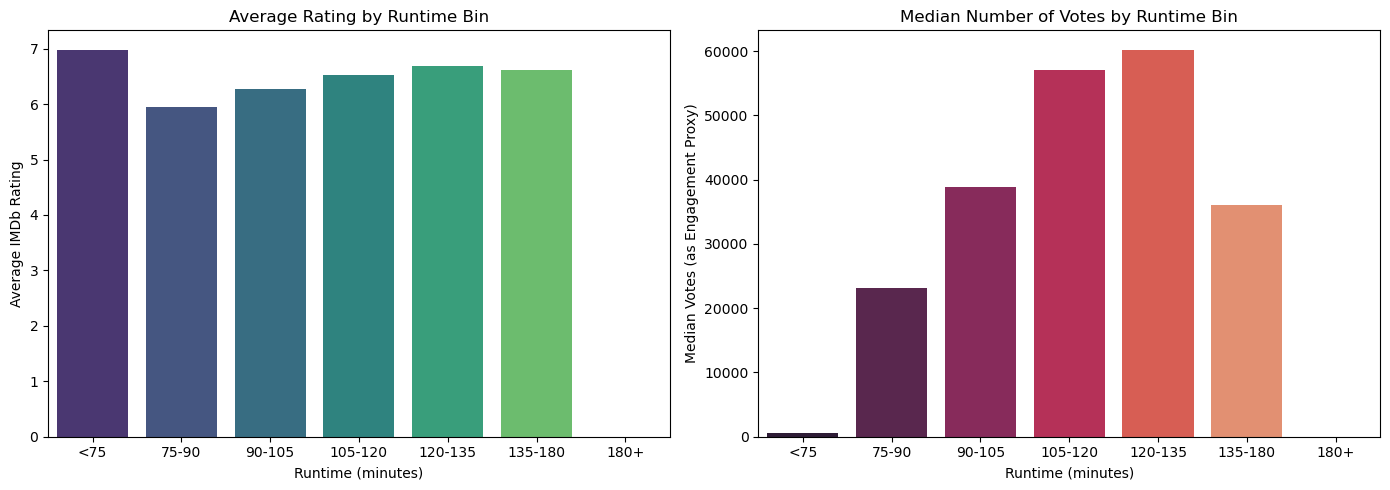

In [217]:
# Plot average rating by runtime bin
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=engagement_stats, x='runtime_bin', y='averagerating', palette='viridis')
plt.title('Average Rating by Runtime Bin')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDb Rating')

# Plot median number of votes by runtime bin
plt.subplot(1, 2, 2)
sns.barplot(data=engagement_stats, x='runtime_bin', y='numvotes', palette='rocket')
plt.title('Median Number of Votes by Runtime Bin')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Median Votes (as Engagement Proxy)')

plt.tight_layout()
plt.show()


In [218]:
# Genre Specific engagement
genre_engagement = df_exploded.groupby(['genre', 'runtime_bin'], observed=True).agg({
    'averagerating': 'mean',
    'numvotes': 'median',
    'title': 'count'
}).reset_index()

# Filter for bins with enough data
genre_engagement = genre_engagement[genre_engagement['title'] >= 15]


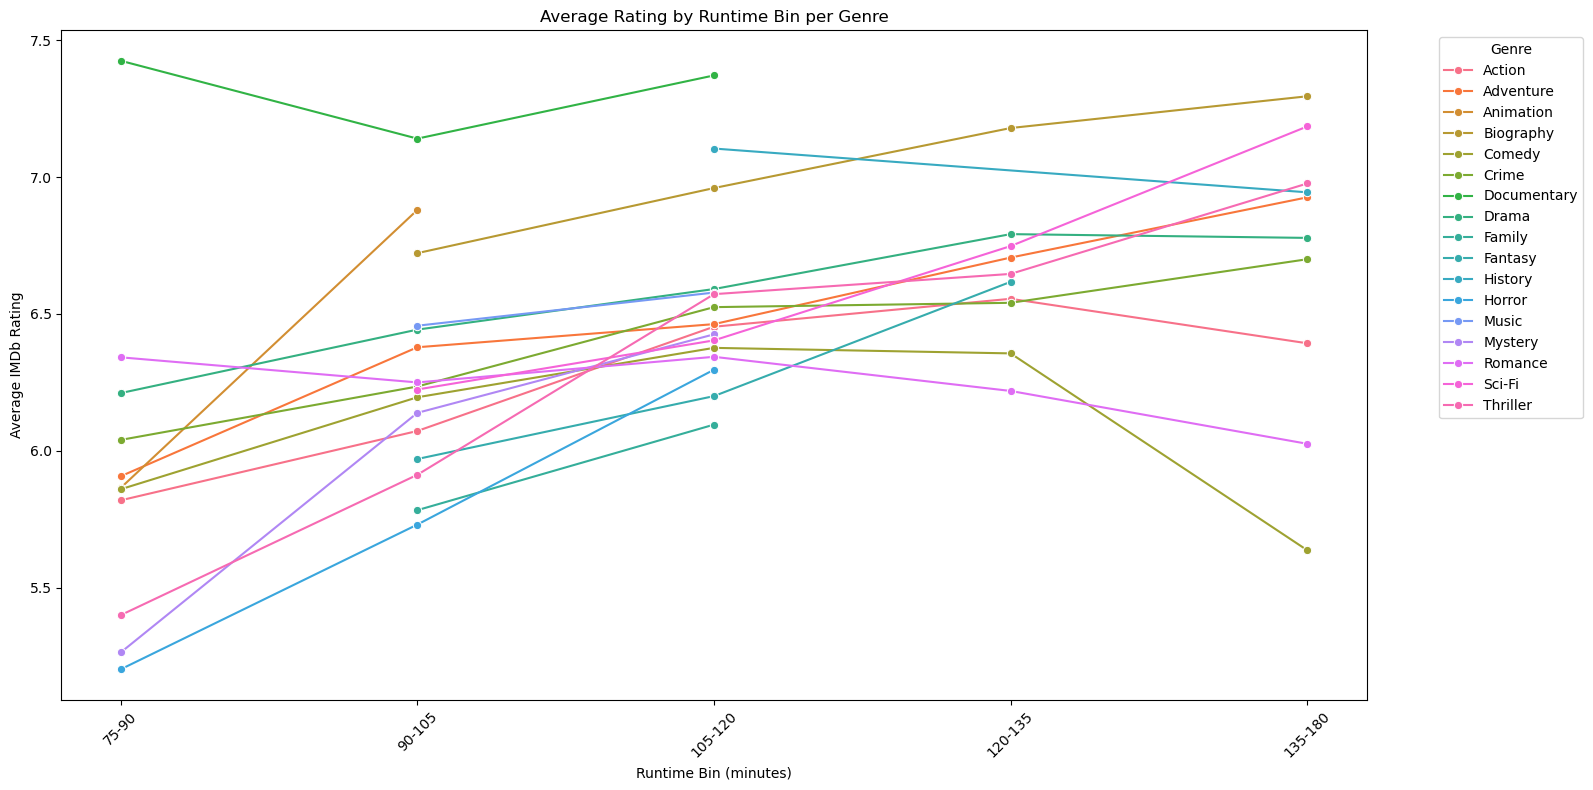

In [219]:

# Filter for genres with enough data
filtered = genre_engagement[genre_engagement['title'] >= 15]

plt.figure(figsize=(16, 8))
sns.lineplot(data=filtered, x='runtime_bin', y='averagerating', hue='genre', marker='o')

plt.title('Average Rating by Runtime Bin per Genre')
plt.xlabel('Runtime Bin (minutes)')
plt.ylabel('Average IMDb Rating')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


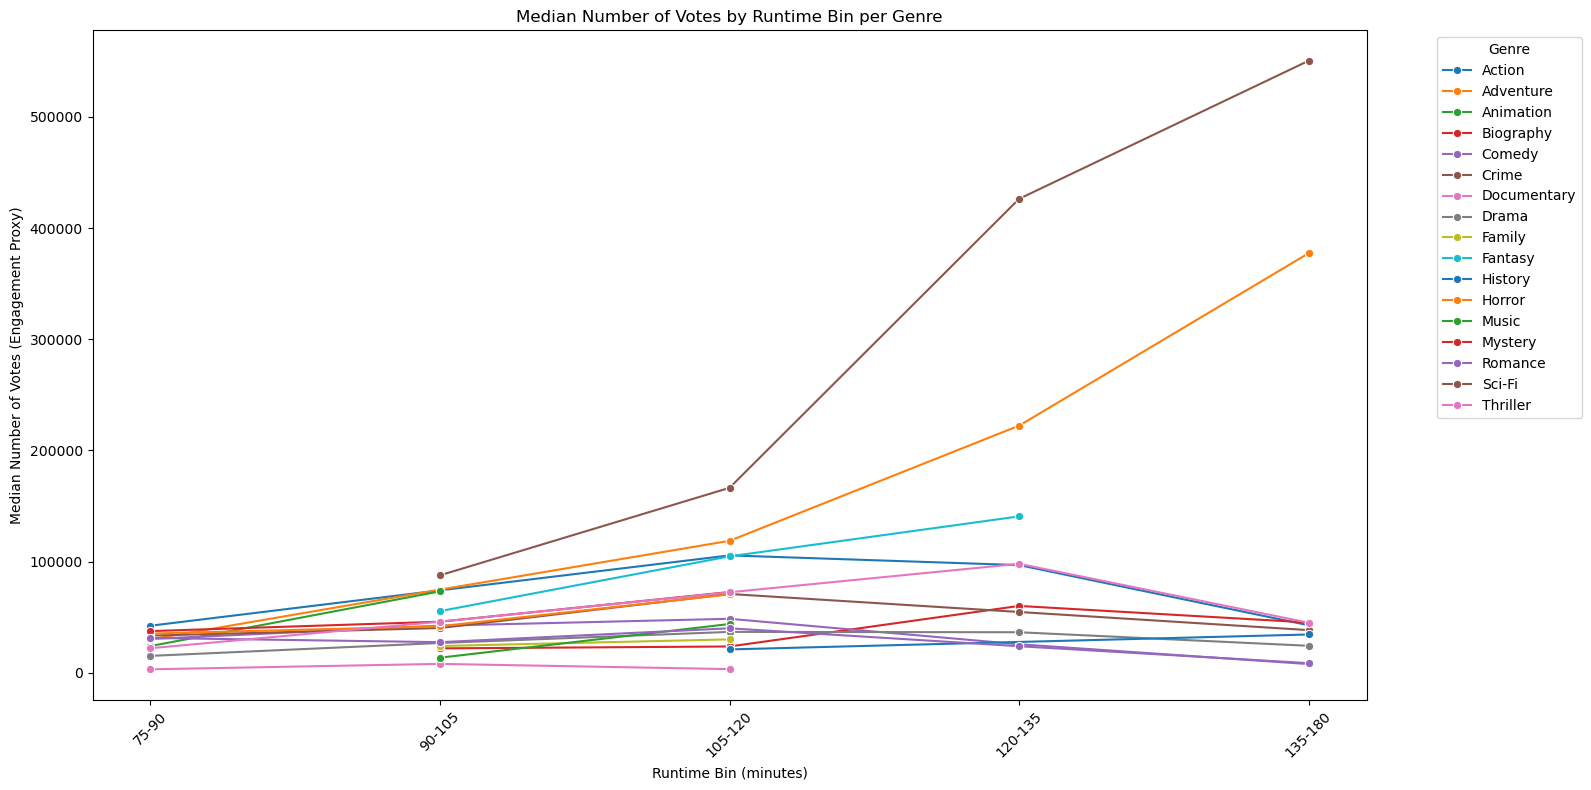

In [220]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=filtered, x='runtime_bin', y='numvotes', hue='genre', marker='o', palette='tab10')

plt.title('Median Number of Votes by Runtime Bin per Genre')
plt.xlabel('Runtime Bin (minutes)')
plt.ylabel('Median Number of Votes (Engagement Proxy)')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [221]:
import statsmodels.api as sm

# Drop missing values 
df_clean = merged_df.dropna(subset=['runtime_minutes', 'averagerating', 'numvotes'])

# Set up the regression
X = df_clean['runtime_minutes']
y = df_clean['averagerating']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
#Summary of regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averagerating   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     62.38
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           4.74e-15
Time:                        19:26:02   Log-Likelihood:                -2674.2
No. Observations:                1910   AIC:                             5352.
Df Residuals:                    1908   BIC:                             5364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.4344      0.128     